In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [6]:
import IPython.core.display
import matplotlib
def apply_styles():
    matplotlib.rcParams['font.size'] = 18
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 3
    matplotlib.rcParams['axes.grid'] = True
    matplotlib.rcParams['grid.color'] = 'k'
    matplotlib.rcParams['grid.linestyle'] = ':'
    matplotlib.rcParams['grid.linewidth'] = 0.5

apply_styles()

In [3]:
vgsales = pd.read_excel('vgsales_v5.xlsx')

In [4]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,8.274000,53.7810,Nintendo,Console
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,31,1.298065,26.1560,Nintendo,Console
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8,4.477500,23.2830,Nintendo,Console
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7,4.714286,21.4500,Nintendo,Console
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20,1.568500,20.3905,Nintendo,HH


In [5]:
vgsales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
15974,15977,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01,14,0.000714,0.0065,Nintendo,HH
15975,15978,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01,13,0.000769,0.0065,Nintendo,Console
15976,15979,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01,8,0.001250,0.0065,Sony,Console
15977,15980,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01,6,0.001667,0.0065,Nintendo,HH
15978,15981,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01,13,0.000769,0.0065,Nintendo,HH


In [6]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales
count,15979.000000,15979.000000,15979.00000,15979.000000,15979.000000,15979.000000,15979.000000,15979.000000,15979.000000,15979.000000
mean,7991.070593,2006.197071,0.26976,0.149093,0.079514,0.048892,0.547537,9.802929,0.087326,0.355899
std,4613.123753,5.714810,0.82956,0.512557,0.314536,0.191612,1.580275,5.714810,0.323913,1.027179
min,1.000000,1980.000000,0.00000,0.000000,0.000000,0.000000,0.010000,1.000000,0.000417,0.006500
25%,3996.500000,2003.000000,0.00000,0.000000,0.000000,0.000000,0.060000,6.000000,0.007500,0.039000
50%,7991.000000,2007.000000,0.08000,0.020000,0.000000,0.010000,0.180000,9.000000,0.020909,0.117000
75%,11985.500000,2010.000000,0.24000,0.110000,0.040000,0.040000,0.490000,13.000000,0.060000,0.318500
max,15981.000000,2015.000000,41.49000,29.020000,10.220000,10.570000,82.740000,36.000000,14.240000,53.781000


In [7]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15979 entries, 0 to 15978
Data columns (total 16 columns):
Rank                15979 non-null int64
Name                15979 non-null object
Platform            15979 non-null object
Year                15979 non-null int64
Genre               15979 non-null object
Publisher           15945 non-null object
NA_Sales            15979 non-null float64
EU_Sales            15979 non-null float64
JP_Sales            15979 non-null float64
Other_Sales         15979 non-null float64
Global_Sales        15979 non-null float64
Years_In_Market     15979 non-null int64
Avg_Annual_Sales    15979 non-null float64
Year_1_Sales        15979 non-null float64
First_Party         15979 non-null object
Platform_Type       15979 non-null object
dtypes: float64(7), int64(3), object(6)
memory usage: 2.0+ MB


In [8]:
vgsales.isna().any()

Rank                False
Name                False
Platform            False
Year                False
Genre               False
Publisher            True
NA_Sales            False
EU_Sales            False
JP_Sales            False
Other_Sales         False
Global_Sales        False
Years_In_Market     False
Avg_Annual_Sales    False
Year_1_Sales        False
First_Party         False
Platform_Type       False
dtype: bool

In [9]:
#Publisher information
set(vgsales["Publisher"])

{'10TACLE Studios',
 '1C Company',
 '20th Century Fox Video Games',
 '2D Boy',
 '3DO',
 '49Games',
 '505 Games',
 '5pb',
 '7G//AMES',
 '989 Sports',
 '989 Studios',
 'AQ Interactive',
 'ASC Games',
 'ASCII Entertainment',
 'ASCII Media Works',
 'ASK',
 'Abylight',
 'Acclaim Entertainment',
 'Accolade',
 'Ackkstudios',
 'Acquire',
 'Activision',
 'Activision Blizzard',
 'Activision Value',
 'Adeline Software',
 'Aerosoft',
 'Agatsuma Entertainment',
 'Agetec',
 'Aksys Games',
 'Alawar Entertainment',
 'Alchemist',
 'Alternative Software',
 'Altron',
 'Alvion',
 'American Softworks',
 'Angel Studios',
 'Answer Software',
 'Aqua Plus',
 'Aques',
 'Arc System Works',
 'Arena Entertainment',
 'Aria',
 'Arika',
 'ArtDink',
 'Aruze Corp',
 'Ascaron Entertainment',
 'Ascaron Entertainment GmbH',
 'Asgard',
 'Asmik Ace Entertainment',
 'Asmik Corp',
 'Aspyr',
 'Astragon',
 'Asylum Entertainment',
 'Atari',
 'Athena',
 'Atlus',
 'Avalon Interactive',
 'Avanquest',
 'Avanquest Software',
 'Axela'

In [10]:
#Platform information
set(vgsales["Platform"])

{2600,
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne'}

In [11]:
#Challenge - finding how sales varies with year and other factors

In [12]:
#vgsales year
vgsales['Year']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
15974    2002
15975    2003
15976    2008
15977    2010
15978    2003
Name: Year, Length: 15979, dtype: int64

In [13]:
#minimum year in sales
vgsales['Year'].min()

1980

In [14]:
#maximum year in sales
vgsales['Year'].max()

2015

In [15]:
vgsales['Global_Sales']

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
15974     0.01
15975     0.01
15976     0.01
15977     0.01
15978     0.01
Name: Global_Sales, Length: 15979, dtype: float64

In [16]:
vgsales['Global_Sales']==vgsales["Global_Sales"].max()

0         True
1        False
2        False
3        False
4        False
         ...  
15974    False
15975    False
15976    False
15977    False
15978    False
Name: Global_Sales, Length: 15979, dtype: bool

In [18]:
vgsales[vgsales['Global_Sales']==vgsales['Global_Sales'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,8.274,53.781,Nintendo,Console


In [19]:
vgsales['Global_Sales'].mean()   #mean global sales is $547,000

0.5475367670067448

In [20]:
vgsales['Global_Sales'].max()

82.74

In [21]:
#Difference between maximum global sales and mean of global sales is very large which tells
#us that actually most video games dont do that well since the maximum video game sales
#is 82.74 million. 

In [22]:
#How many games are doing better than average (mean global sales)
vgsales['Global_Sales']>=vgsales['Global_Sales'].mean()

0         True
1         True
2         True
3         True
4         True
         ...  
15974    False
15975    False
15976    False
15977    False
15978    False
Name: Global_Sales, Length: 15979, dtype: bool

In [23]:
#Only 3609 games performed better than the average 
vgsales[vgsales['Global_Sales']>=vgsales['Global_Sales'].mean()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,8.274000,53.7810,Nintendo,Console
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,31,1.298065,26.1560,Nintendo,Console
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8,4.477500,23.2830,Nintendo,Console
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7,4.714286,21.4500,Nintendo,Console
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20,1.568500,20.3905,Nintendo,HH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,3606,Are You Smarter than a 5th Grader? Make the Grade,Wii,2008,Misc,THQ,0.51,0.00,0.00,0.04,0.55,8,0.068750,0.3575,Nintendo,Console
3605,3607,American Idol,PS2,2003,Misc,Codemasters,0.27,0.21,0.00,0.07,0.55,13,0.042308,0.3575,Sony,Console
3606,3608,Top Gun: Fire at Will!,PS,1996,Misc,Microprose,0.30,0.21,0.00,0.04,0.55,20,0.027500,0.3575,Sony,Console
3607,3609,Red Dead Revolver,XB,2004,Shooter,Take-Two Interactive,0.40,0.12,0.00,0.02,0.55,12,0.045833,0.3575,Microsoft,Console


In [24]:
#Average years for any game in the market
#Substantial number of games for produced in the second half of our data
vgsales['Years_In_Market'].mean()

9.80292884410789

In [25]:
vgsales['Years_In_Market'].max()

36

In [26]:
vgsales[vgsales['Years_In_Market']==vgsales['Years_In_Market'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
256,257,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,36,0.119722,2.8015,Atari,Console
537,538,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,36,0.076667,1.7940,Atari,Console
1733,1735,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15,36,0.031944,0.7475,Atari,Console
1934,1936,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05,36,0.029167,0.6825,Atari,Console
2609,2611,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77,36,0.021389,0.5005,Atari,Console
3941,3943,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.0,0.01,0.49,36,0.013611,0.3185,Atari,Console
5244,5246,Freeway,2600,1980,Action,Activision,0.32,0.02,0.0,0.00,0.34,36,0.009444,0.2210,Atari,Console
6156,6158,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.0,0.00,0.27,36,0.007500,0.1755,Atari,Console
6725,6727,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.0,0.00,0.24,36,0.006667,0.1560,Atari,Console


In [27]:
vgsales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Years_In_Market', 'Avg_Annual_Sales', 'Year_1_Sales', 'First_Party',
       'Platform_Type'],
      dtype='object')

In [28]:
#Total game count by Genres
#Misc - any other games not classified into Genres
genre_fig = vgsales['Genre'].value_counts()
genre_fig

Action          3133
Sports          2266
Misc            1692
Role-Playing    1429
Shooter         1250
Adventure       1242
Racing          1206
Platform         866
Simulation       841
Fighting         822
Strategy         661
Puzzle           571
Name: Genre, dtype: int64

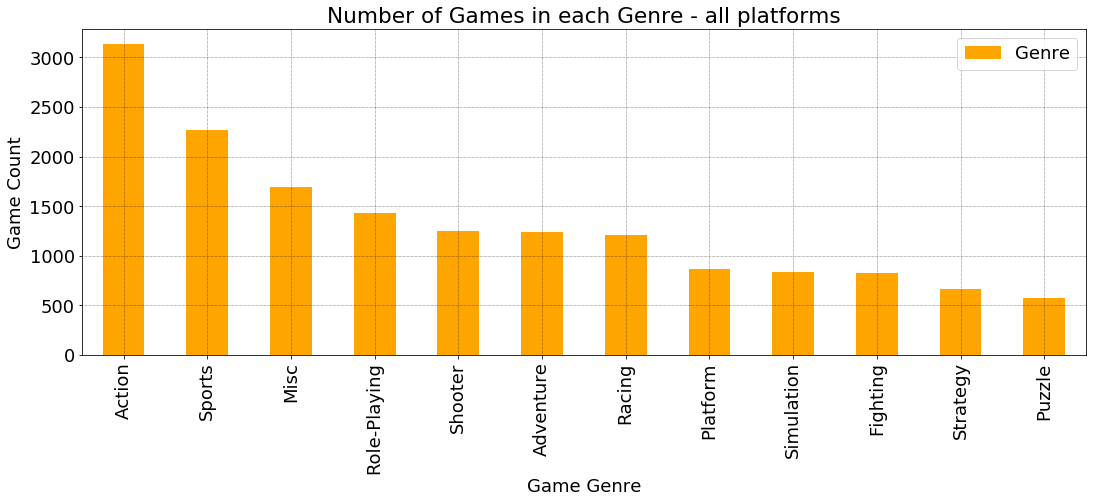

In [29]:
#Total game count by Genres plot
genre_fig.plot(kind = 'bar', color = 'orange')
plt.title("Number of Games in each Genre - all platforms")
plt.xlabel("Game Genre")
plt.ylabel("Game Count")
plt.legend(loc = "upper right")
#Games in Misc are newly created and therefore it ended up without any genre classification

In [30]:
genre_pivot = pd.pivot_table(vgsales, index = 'Genre', values = 'Global_Sales', aggfunc = 'sum')

In [31]:
genre_pivot

,Global_Sales
Genre,
Action,1702.96
Adventure,232.99
Fighting,440.19
Misc,796.45
Platform,827.08
Puzzle,242.22
Racing,725.13
Role-Playing,917.04
Shooter,1007.98


Text(0, 0.5, 'Global Sales/Millions')

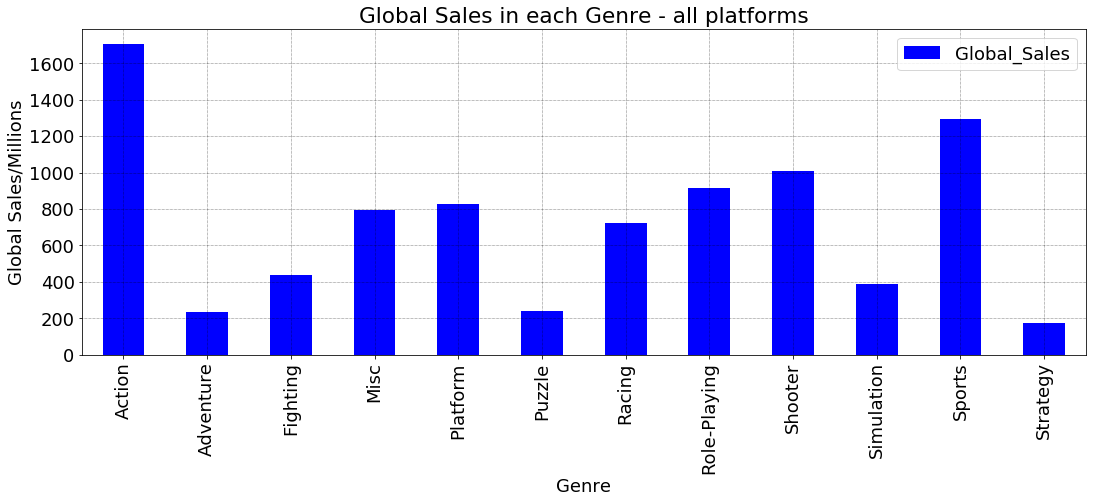

In [32]:
genre_pivot.plot(kind = 'bar', color = 'blue')
plt.title("Global Sales in each Genre - all platforms")
plt.ylabel("Global Sales/Millions")

In [33]:
vgsales['Publisher'].value_counts()

Electronic Arts                 1319
Activision                       952
Ubisoft                          904
Namco Bandai Games               888
Konami Digital Entertainment     815
                                ... 
Giza10                             1
Interplay Productions              1
Maximum Family Games               1
Piacci                             1
American Softworks                 1
Name: Publisher, Length: 564, dtype: int64

In [34]:
#Publisher global sales
pub_pivot = pd.pivot_table(vgsales, index = 'Publisher', values = 'Global_Sales', aggfunc = 'sum')
pub_pivot

,Global_Sales
Publisher,
10TACLE Studios,0.11
1C Company,0.10
20th Century Fox Video Games,1.94
2D Boy,0.04
3DO,10.12
...,...
id Software,0.03
imageepoch Inc.,0.04
inXile Entertainment,0.10


In [35]:
vgsales['Name'].value_counts()

Need for Speed: Most Wanted                                              12
FIFA 14                                                                   9
Ratatouille                                                               9
LEGO Marvel Super Heroes                                                  9
FIFA Soccer 13                                                            8
                                                                         ..
NASCAR Kart Racing                                                        1
Super Bomberman 3                                                         1
Tiny Tank                                                                 1
No.1 Muscle Ranking - Kinniku Banzuke Vol. 1: Oregasaikyouno Otokoda!     1
Kinect Rush: A Disney Pixar Adventure                                     1
Name: Name, Length: 11163, dtype: int64

In [36]:
#Top 10 publishers game average annual sales label creation
pub_data = vgsales.groupby(['Publisher']).sum()['Avg_Annual_Sales']
pub_data = pd.DataFrame(pub_data.sort_values(ascending = False))[0:10]
pub = pub_data.index
pub_data.columns = ['Avg_Annual_Sales']
pub

Index(['Nintendo', 'Electronic Arts', 'Activision', 'Ubisoft',
       'Take-Two Interactive', 'Sony Computer Entertainment',
       'Warner Bros. Interactive Entertainment', 'Microsoft Game Studios',
       'Namco Bandai Games', 'THQ'],
      dtype='object', name='Publisher')

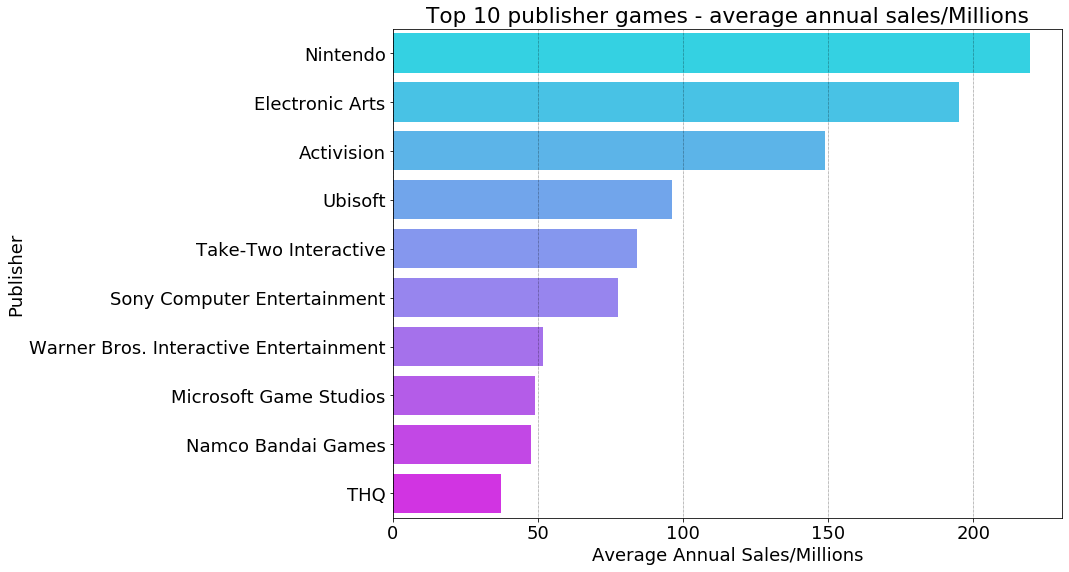

In [37]:
#Plot horizontal bar graph
colors = sns.color_palette('cool', len(pub_data))
plt.figure(figsize = (12, 9))
ax = sns.barplot(y = pub, x = 'Avg_Annual_Sales', data = pub_data, orient = 'h', palette = colors)
ax.set_xlabel(xlabel = 'Average Annual Sales/Millions')
ax.set_ylabel(ylabel = 'Publisher')
ax.set_title(label = 'Top 10 publisher games - average annual sales/Millions')
ax.set_yticklabels(labels = pub)
plt.show();

(10.0, 0.0)

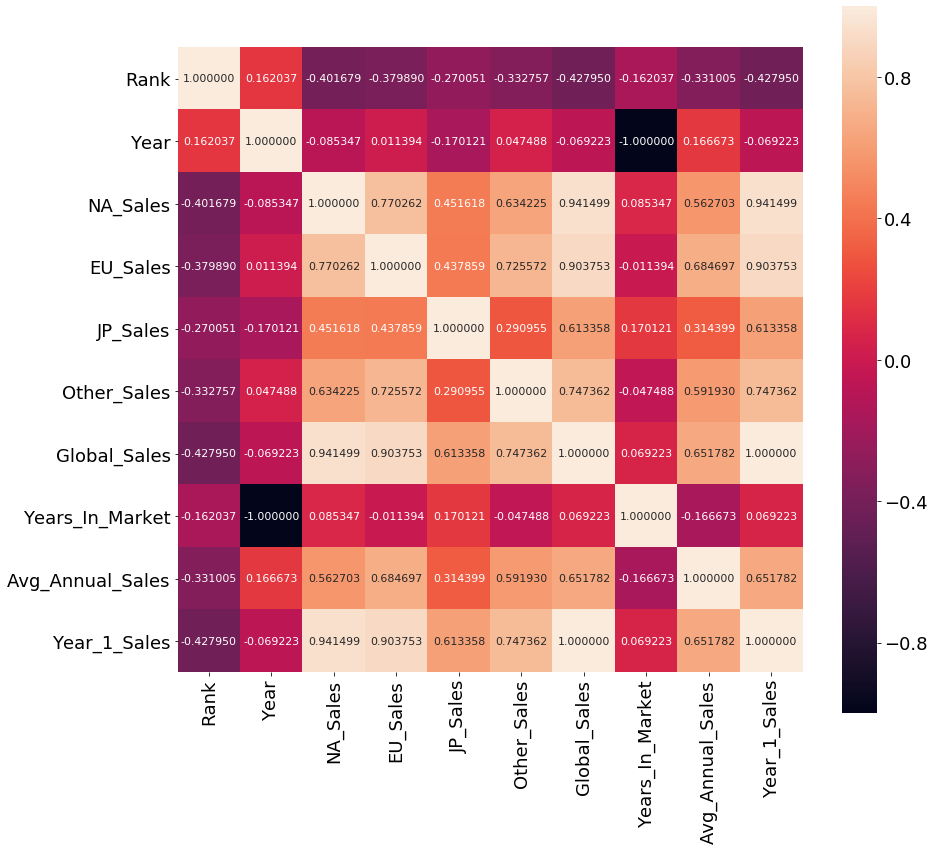

In [38]:
corr = vgsales.corr()
corr = (corr)
plt.figure(figsize = (14,13))
ax = sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '2f', annot_kws =
{'size': 11},
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Global sales is more correlated with the Region Sales
#Global sales is actually similar to Year_1_Sales

Text(0.5, 1.0, 'Sales by Genre')

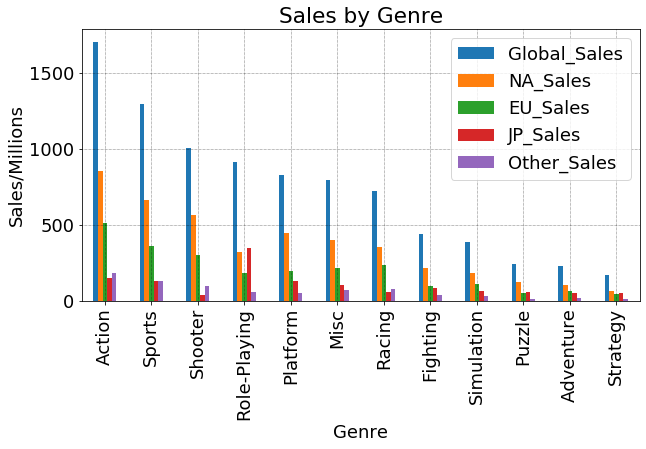

In [7]:
#Platform games have higher sales while Adventure games have the lowest in global sales
#Most contributor to regional sales
vgsales.groupby('Genre')['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum().sort_values(by = ['Global_Sales'],ascending = False).plot(kind = 'bar', figsize = (10,5))
plt.ylabel('Sales/Millions')
plt.title('Sales by Genre')

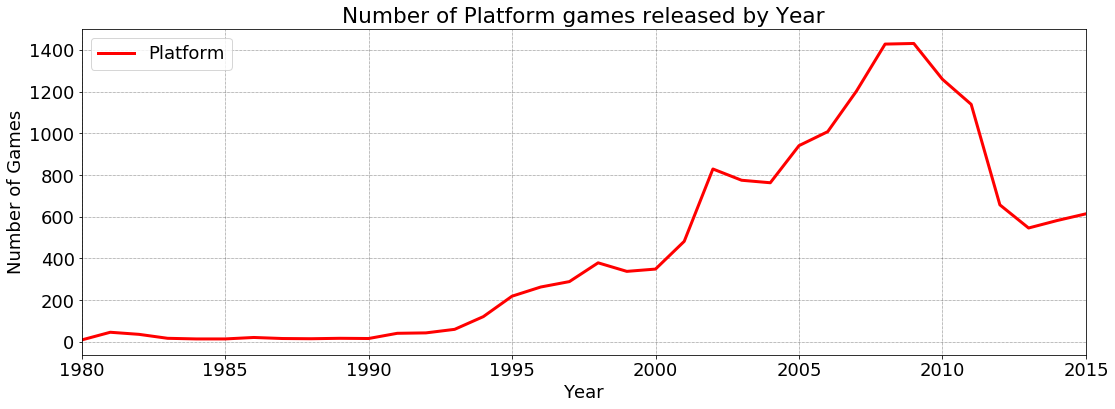

In [40]:
#Number of platform games released by year
vgsales.groupby('Year')['Platform'].count().plot(kind = 'line', color = 'red')
plt.ylabel('Number of Games')
plt.title("Number of Platform games released by Year")
plt.legend(loc = "upper left")

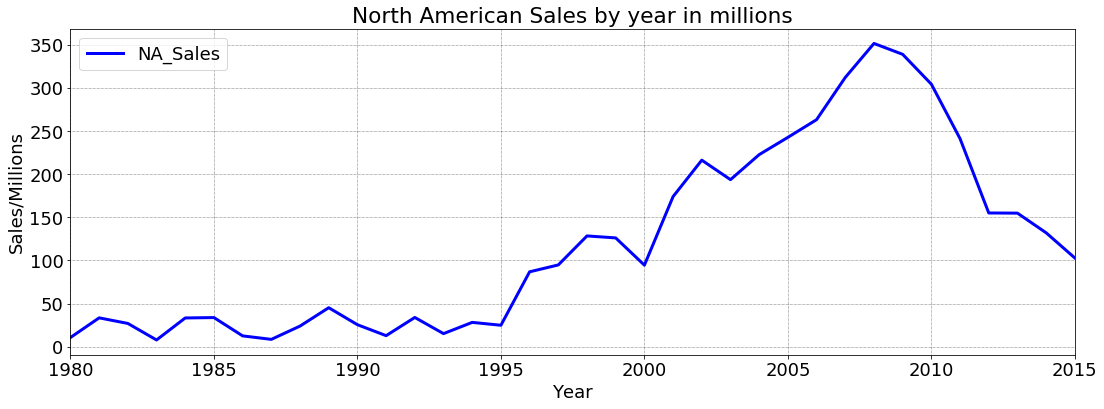

In [41]:
#North American Sales by year in thousands
vgsales.groupby('Year')['NA_Sales'].sum().plot(kind = 'line', color = "blue")
plt.ylabel('Sales/Millions')
plt.title("North American Sales by year in millions")
plt.legend(loc = "upper left")

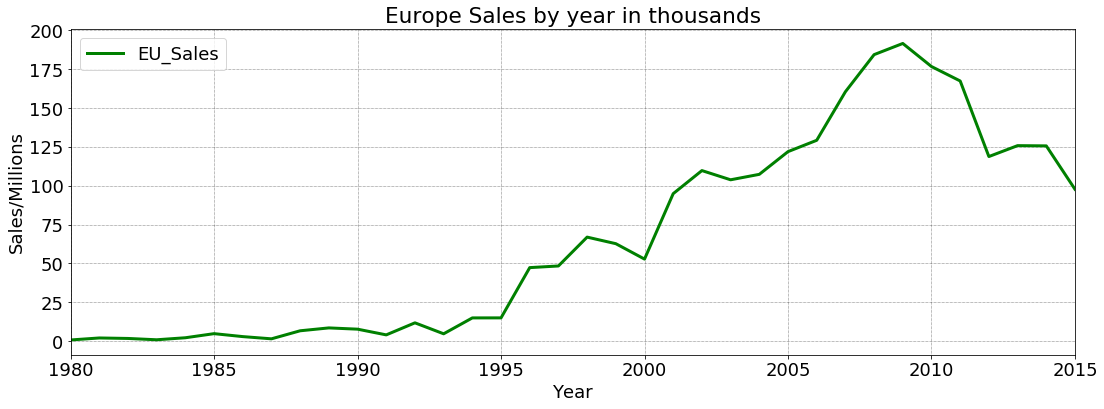

In [42]:
#Europe Sales by year in thousands
vgsales.groupby('Year')['EU_Sales'].sum().plot(kind = 'line', color = 'green')
plt.ylabel('Sales/Millions')
plt.title("Europe Sales by year in thousands")
plt.legend(loc = "upper left")

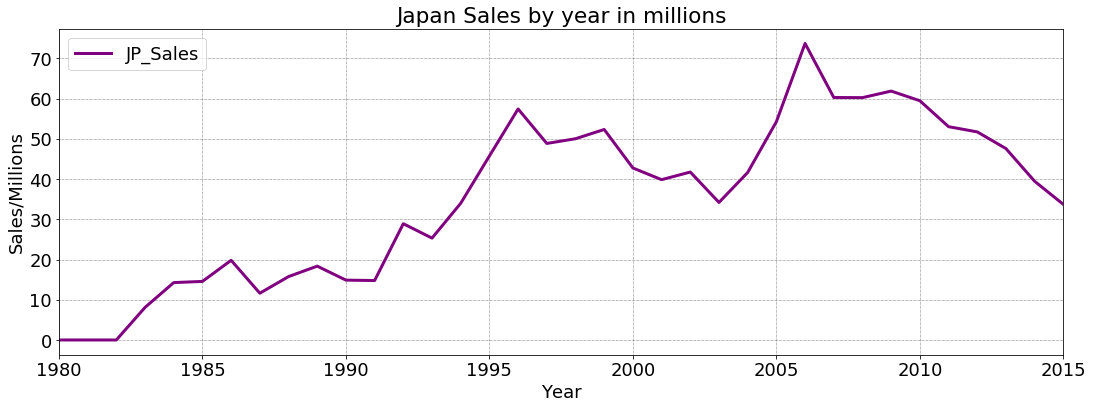

In [43]:
#Japan Sales by year in Millions
vgsales.groupby('Year')['JP_Sales'].sum().plot(kind = 'line', color = 'purple')
plt.ylabel('Sales/Millions')
plt.title("Japan Sales by year in millions")
plt.legend(loc = "upper left")

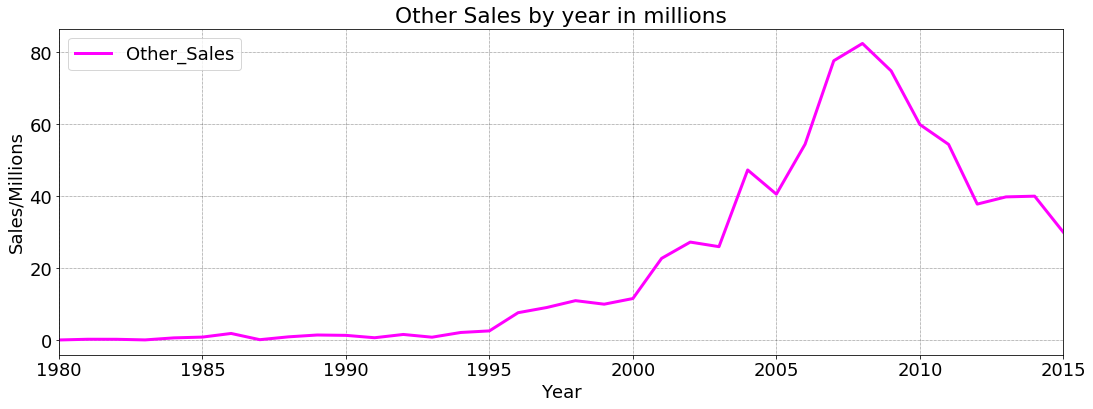

In [44]:
#Other Sales by year in Millions
vgsales.groupby('Year')['Other_Sales'].sum().plot(kind = 'line', color = 'magenta')
plt.ylabel('Sales/Millions')
plt.title("Other Sales by year in millions")
plt.legend(loc = "upper left")

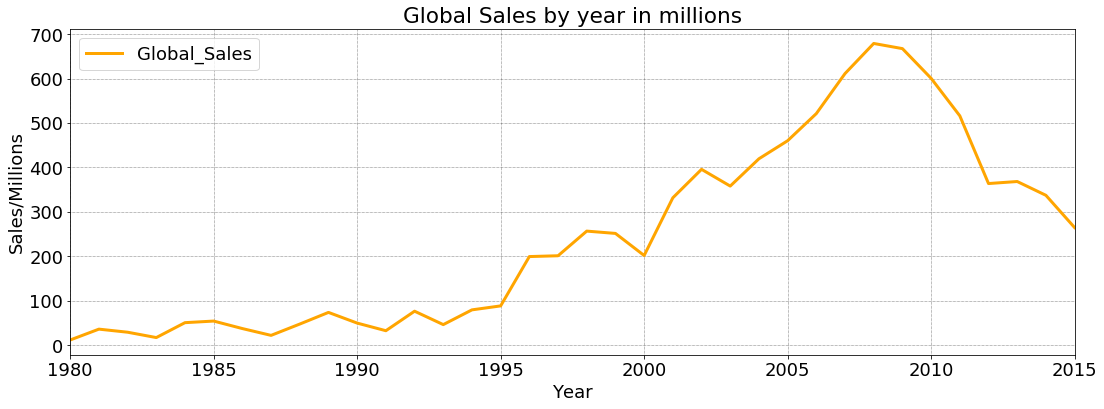

In [45]:
#Global Sales by year in millions
vgsales.groupby('Year')['Global_Sales'].sum().plot(kind = 'line', color = 'orange')
plt.ylabel('Sales/Millions')
plt.title("Global Sales by year in millions")
plt.legend(loc = "upper left")

In [46]:
#Use plot for first party and Year count

In [47]:
#Game releases according to Year for different platforms
vgsales_year_platform = vgsales.groupby('Year').Platform.value_counts()
no_of_plots = len(vgsales.Year.unique())
colormap = plt.cm.gist_ncar #setting color map

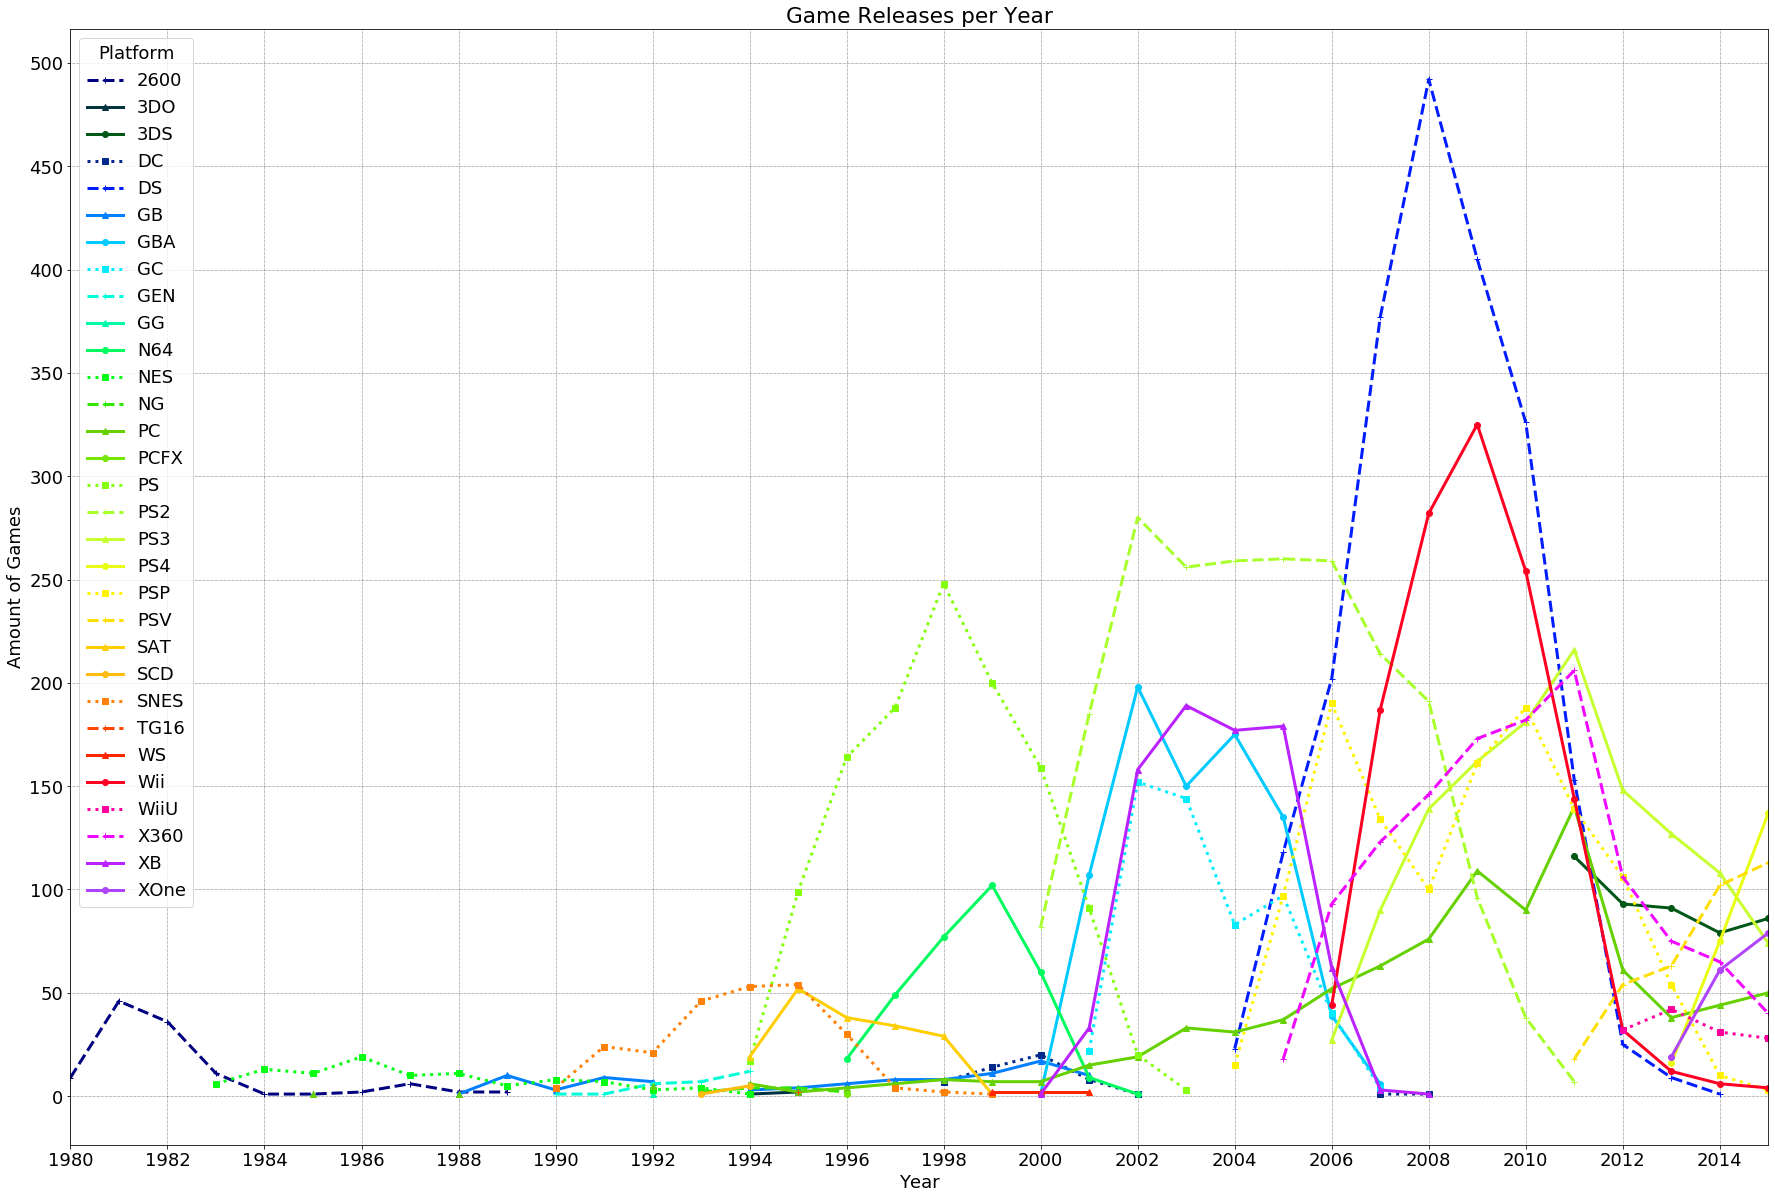

In [48]:
linestyle = ["+--", "^-", "-o", ":s"]*10
colors = [colormap(i) for i in np.linspace(0, 1, no_of_plots)] #color gradient 
vgsales_year_platform.unstack().plot(kind = 'line', style = linestyle, figsize = (25,17), stacked = False, color = colors)
plt.title('Game Releases per Year')
plt.xlabel('Year')
plt.ylabel('Amount of Games')
#Plot xticks
plt.ticks = vgsales.Year.unique()
plt.locator_params(nbins = 20)
plt.tight_layout()
plt.show()

In [49]:
#Considering DS platform games only
DS_platform = vgsales[vgsales['Platform'] == 'DS']

In [50]:
DS_platform

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,10,3.001000,19.5065,Nintendo,HH
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,11,2.250909,16.0940,Nintendo,HH
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,11,2.129091,15.2230,Nintendo,HH
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,11,1.838182,13.1430,Nintendo,HH
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,10,1.836000,11.9340,Nintendo,HH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15968,15971,Secret Files 2: Puritas Cordis,DS,2009,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01,7,0.001429,0.0065,Nintendo,HH
15969,15972,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01,7,0.001429,0.0065,Nintendo,HH
15970,15973,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,8,0.001250,0.0065,Nintendo,HH
15973,15976,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,8,0.001250,0.0065,Nintendo,HH


In [51]:
#Best Selling Games on DS Platform based on Global Sales
DS_platform.sort_values(by = 'Global_Sales', ascending = False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,10,3.001000,19.5065,Nintendo,HH
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,11,2.250909,16.0940,Nintendo,HH
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,11,2.129091,15.2230,Nintendo,HH
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,11,1.838182,13.1430,Nintendo,HH
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,10,1.836000,11.9340,Nintendo,HH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,15575,Chokkan! Asonde Relaxuma,DS,2008,Action,Rocket Company,0.00,0.00,0.01,0.00,0.01,8,0.001250,0.0065,Nintendo,HH
15569,15572,Pet Shop Monogatari DS 2,DS,2010,Simulation,Taito,0.00,0.00,0.01,0.00,0.01,6,0.001667,0.0065,Nintendo,HH
15562,15565,Game Book DS: Sword World 2.0,DS,2009,Role-Playing,Broccoli,0.00,0.00,0.01,0.00,0.01,7,0.001429,0.0065,Nintendo,HH
15560,15563,Kikiite Hajimaru: Eigo Kaiwa Training - KikiTore,DS,2008,Misc,Benesse,0.00,0.00,0.01,0.00,0.01,8,0.001250,0.0065,Nintendo,HH


In [52]:
#Simplifying DS dataframe to see the top sold games according to global sales and year
DS_Sales = DS_platform[["Name", "Year", "Global_Sales"]]
DS_Sales.head()

,Name,Year,Global_Sales
6,New Super Mario Bros.,2006,30.01
10,Nintendogs,2005,24.76
11,Mario Kart DS,2005,23.42
19,Brain Age: Train Your Brain in Minutes a Day,2005,20.22
20,Pokemon Diamond/Pokemon Pearl,2006,18.36


In [53]:
DS_Sales = DS_Sales.sort_values(by = "Year")
DS_Sales.head()

,Name,Year,Global_Sales
15316,Strongest Tokyo University Shogi DS,1985,0.02
8188,Zoo Keeper,2004,0.17
6385,Polarium,2004,0.26
3900,Spider-Man 2,2004,0.50
9795,Ping Pals,2004,0.11


In [54]:
#Plotting top selling game totals by year
DS_Sales_plot = DS_Sales.groupby(["Year"]).sum()
DS_Sales_plot

,Global_Sales
Year,
1985,0.02
2004,17.46
2005,131.40
2006,121.15
2007,149.36
2008,147.89
2009,121.99
2010,87.98
2011,27.80


Text(0, 0.5, 'Global Sales/Millions')

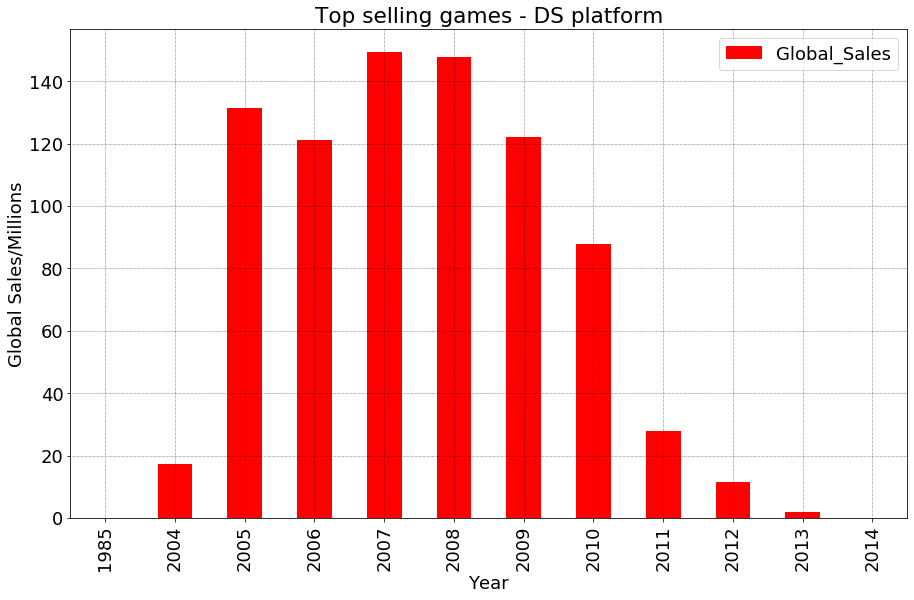

In [55]:
DS_Sales_plot.plot(kind = 'bar', figsize = (15, 9), title = 'Top selling games - DS platform'
                  ,color = 'red')
plt.ylabel('Global Sales/Millions')


In [56]:
#Most selling genres for DS platform per year
DS_genre_year = DS_platform.groupby(['Year', 'Genre']).sum()

In [57]:
#Look at DS_genre_year description
DS_genre_year.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,185913.336449,3.628879,1.813738,1.635701,0.563271,7.651121,155.504673,0.951605,4.973229
std,202253.460463,4.395877,2.806551,2.736666,0.789319,9.757637,166.247336,1.144043,6.342464
min,60.000000,0.000000,0.000000,0.000000,0.000000,0.020000,2.000000,0.000645,0.013000
25%,35791.500000,0.425000,0.065000,0.035000,0.045000,0.990000,35.500000,0.131326,0.643500
50%,103595.000000,1.660000,0.500000,0.500000,0.170000,2.720000,90.000000,0.368182,1.768000
75%,289638.000000,5.465000,2.560000,1.620000,0.795000,11.050000,214.500000,1.582208,7.182500
max,877824.000000,16.500000,14.700000,12.320000,3.740000,40.650000,736.000000,4.688571,26.422500


In [58]:
DS_genre_year = DS_genre_year[["Global_Sales"]]
DS_genre_year.head()

Global_Sales
Year Genre                  
1985 Action             0.02
2004 Action             0.50
     Adventure          0.06
     Misc               0.34
     Platform          10.42

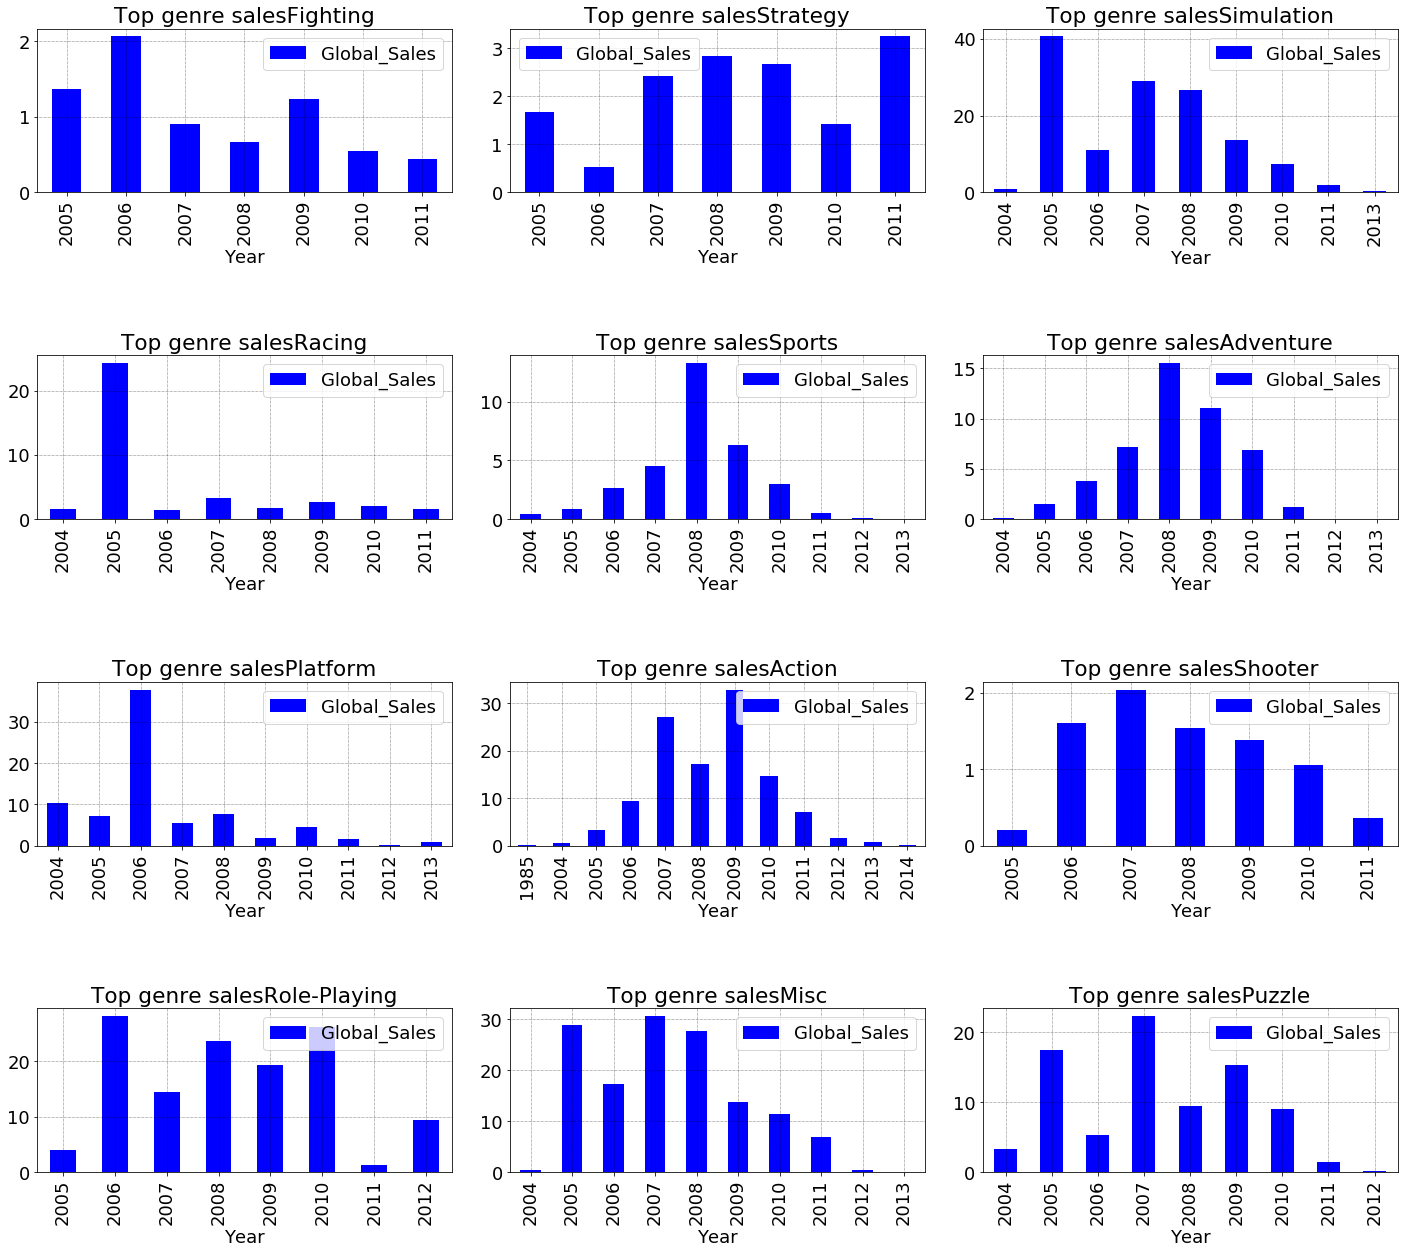

In [59]:
#Plot all top selling genres for DS platform according to Global Sales
column_limit = 2
fig, axes = plt.subplots(nrows = 4, ncols = column_limit + 1)
fig.tight_layout()
genres = set(DS_genre_year.index.get_level_values(1))

row = 0
column = 0
for genre in genres:
    
    ds_genres = DS_genre_year.xs(genre, level = 'Genre')
    ds_genres.plot(kind = 'bar', color = 'blue', title = 'Top genre sales' + genre, ax = axes[row, column], figsize = (20, 19))
    
    if column == column_limit:
        column = -1
        row += 1
    column += 1

In [60]:
#First Party vs. Years in the market
first_party_pivot = pd.pivot_table(vgsales, index = 'First_Party', values = 'Years_In_Market')
first_party_pivot

,Years_In_Market
First_Party,
Atari,33.862069
Microsoft,8.104614
Nintendo,9.850890
Other,19.974619
PC,7.530387
SEGA,18.744186
Sony,9.789879


Text(0, 0.5, 'Number of Years')

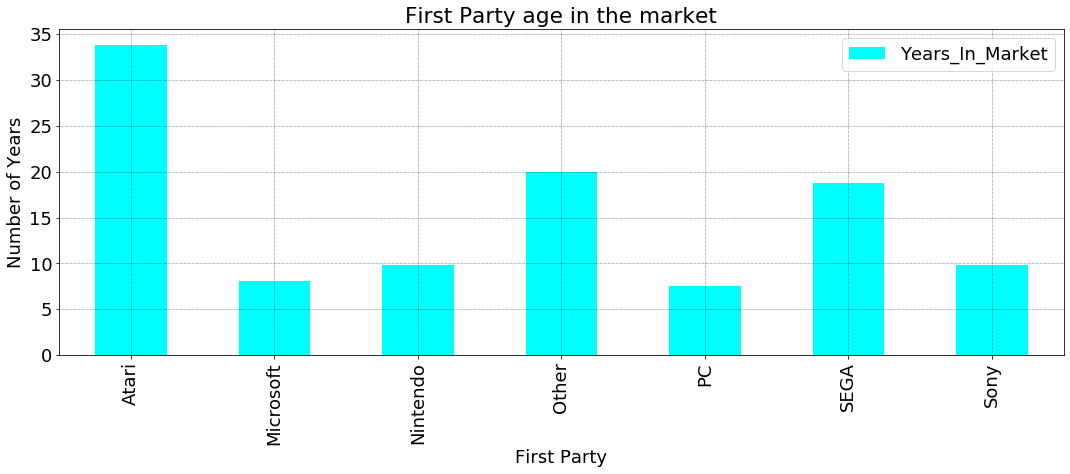

In [61]:
#Plotting First Party vs. Years in the market
first_party_pivot.plot(kind = 'bar', color = 'cyan')
plt.title("First Party age in the market")
plt.xlabel("First Party")
plt.ylabel("Number of Years")

In [62]:
#Platform Type and Average Annual Sales
plt_type_pivot = pd.pivot_table(vgsales, index = 'Platform_Type', values = 'Avg_Annual_Sales')
plt_type_pivot

,Avg_Annual_Sales
Platform_Type,
Console,0.098083
HH,0.065896
Other,0.009358
PC,0.052117


Text(0, 0.5, 'Average Sales all Regions/millions')

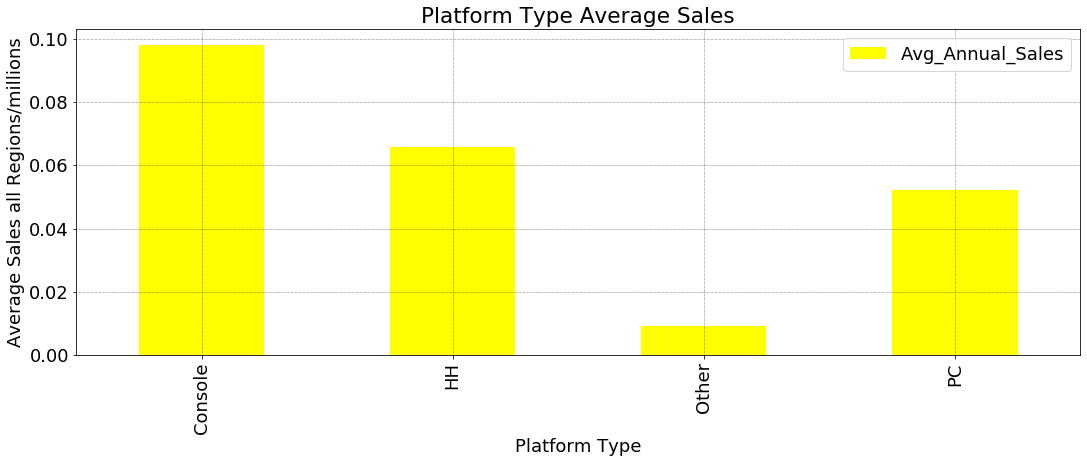

In [63]:
#Plotting Platform Type vs. Average Annual Sales
plt_type_pivot.plot(kind = 'bar', color = 'yellow')
plt.title("Platform Type Average Sales")
plt.xlabel("Platform Type")
plt.ylabel("Average Sales all Regions/millions")

In [64]:
## performance for each genre by platform based on year 1 sales
vgsales_first_yr = vgsales.groupby('Year').First_Party.value_counts()
no_of_plots_yr = len(vgsales.Year.unique())
colormap = plt.cm.gist_ncar #setting color map

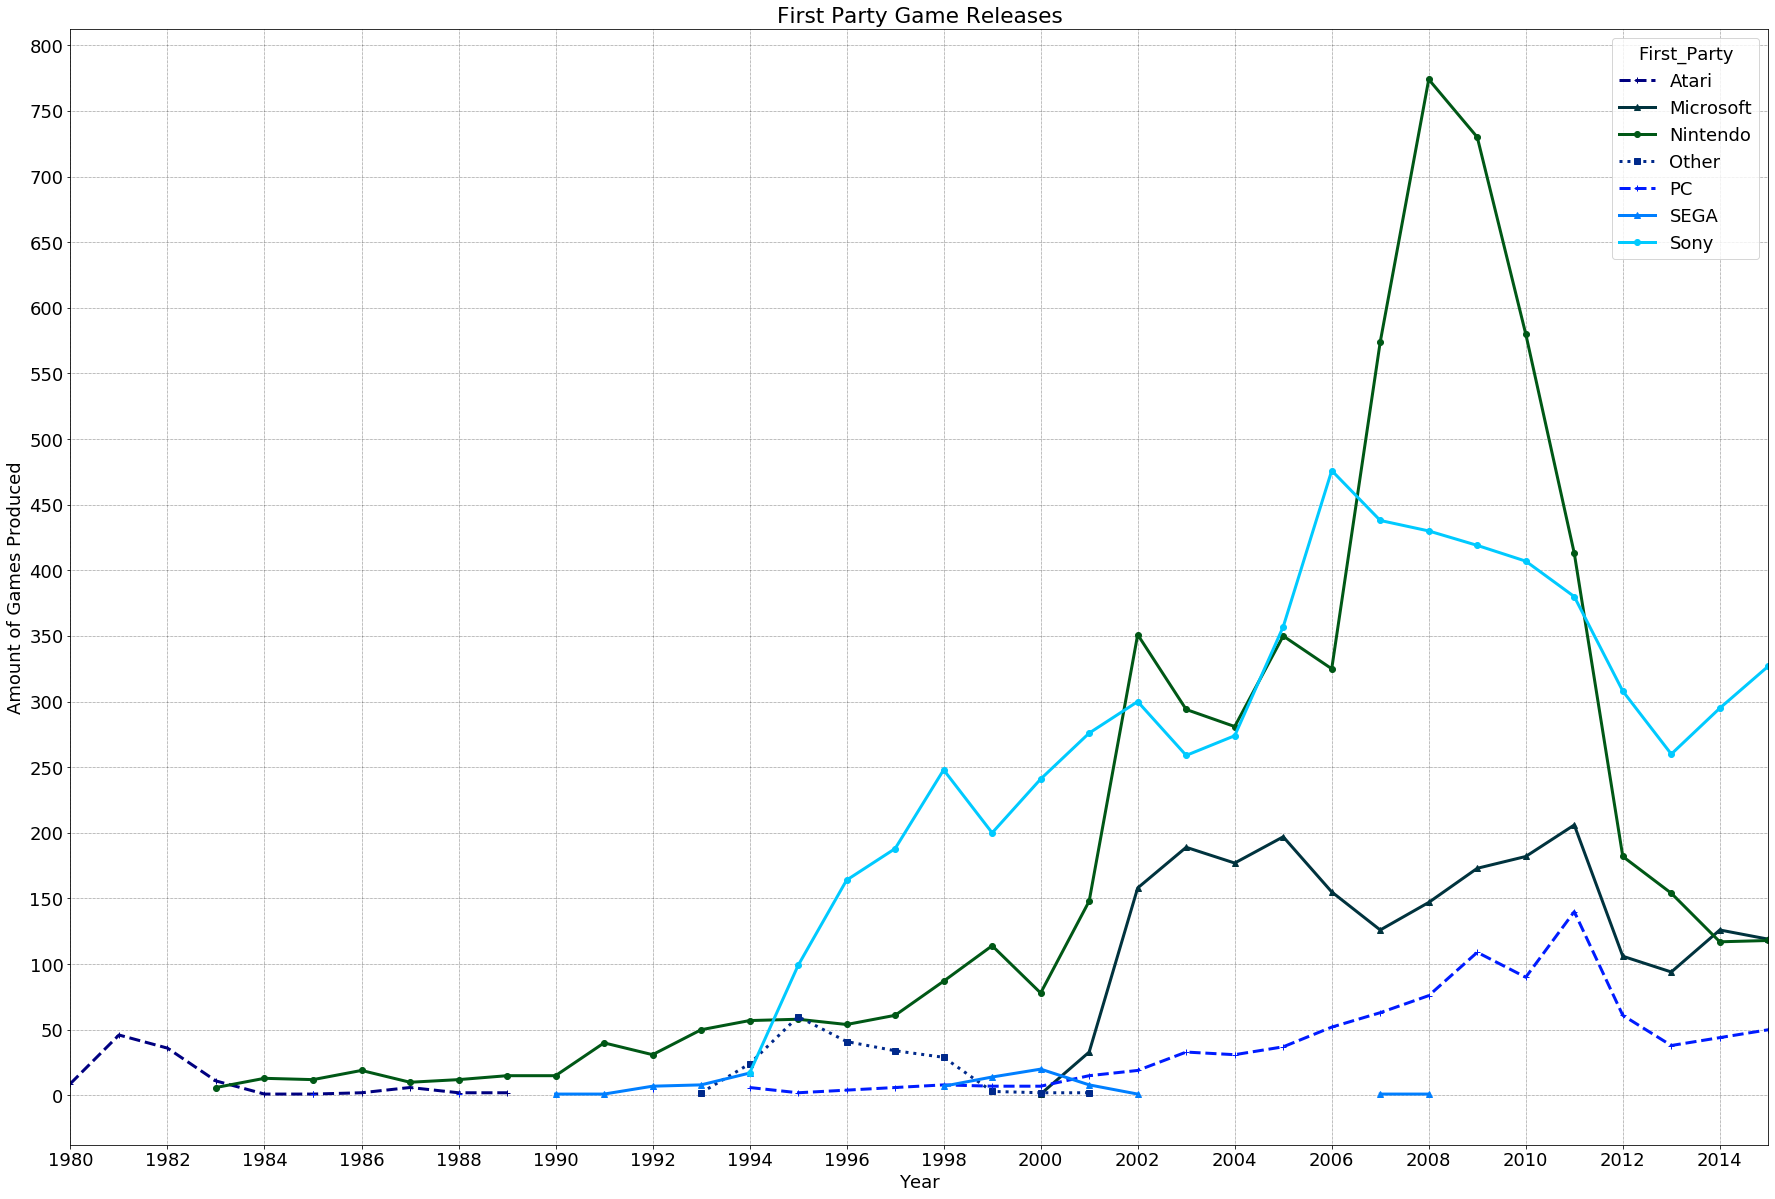

In [65]:
linestyle = ["+--", "^-", "-o", ":s"]*10
colors = [colormap(i) for i in np.linspace(0, 1, no_of_plots_yr)] #color gradient 
vgsales_first_yr.unstack().plot(kind = 'line', style = linestyle, figsize = (25,17), stacked = False, color = colors)
plt.title('First Party Game Releases')
plt.xlabel('Year')
plt.ylabel('Amount of Games Produced')
#Plot xticks
plt.ticks = vgsales.Year.unique()
plt.locator_params(nbins = 20)
plt.tight_layout()
plt.show()

In [66]:
#Genres total revenue - Global Sales
revenue = vgsales.groupby(['Genre']).sum()['Global_Sales']
revenue = pd.DataFrame(revenue.sort_values(ascending = False))
genres_rev = revenue.index
revenue.columns = ['Revenue']

In [67]:
revenue

,Revenue
Genre,
Action,1702.96
Sports,1294.64
Shooter,1007.98
Role-Playing,917.04
Platform,827.08
Misc,796.45
Racing,725.13
Fighting,440.19
Simulation,389.48


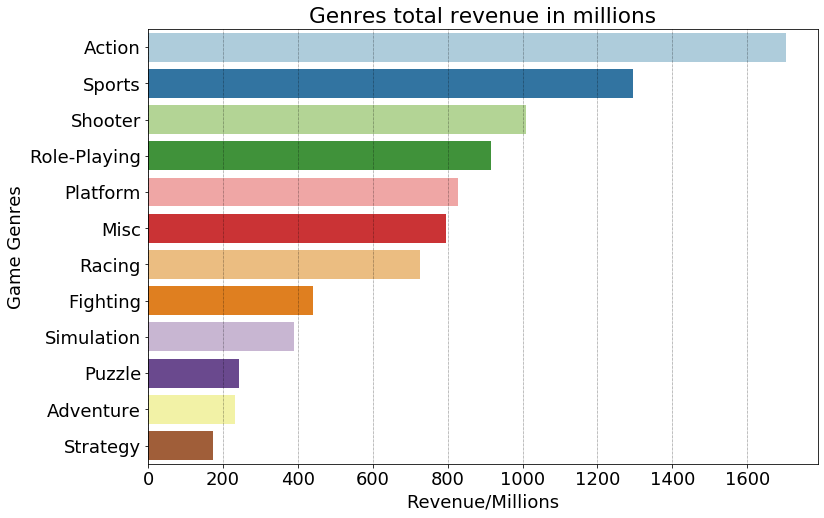

In [68]:
colors = sns.color_palette('Paired', len(revenue))
plt.figure(figsize = (12, 8))
ax = sns.barplot(y = genres_rev, x = 'Revenue', data = revenue, orient = 'h', palette = colors)
ax.set_xlabel(xlabel = 'Revenue/Millions')
ax.set_ylabel(ylabel = 'Game Genres')
ax.set_title(label = 'Genres total revenue in millions')
ax.set_yticklabels(labels = genres_rev)
plt.show()


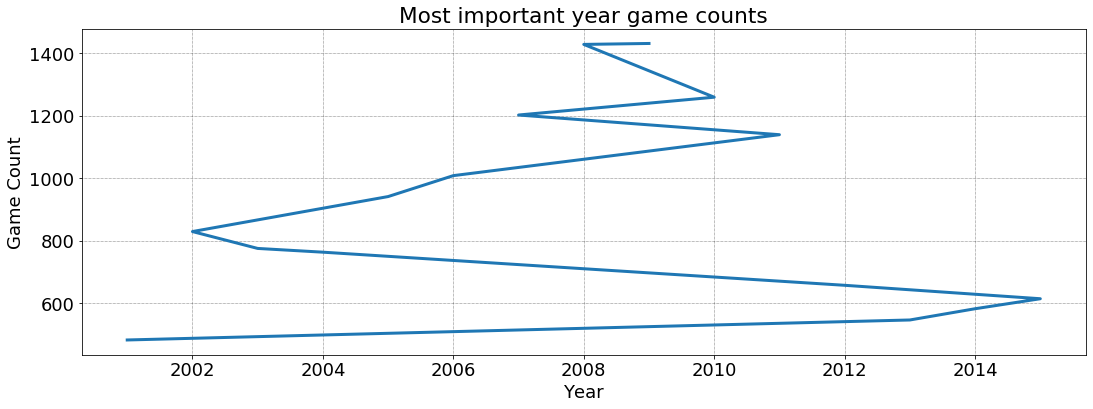

In [73]:
#Most important year game counts
yr = vgsales.groupby('Year')['Year'].count().sort_values(ascending = False).head(15)
plt.title('Most important year game counts')
plt.xlabel('Year')
plt.ylabel('Game Count')
plt.plot(yr)

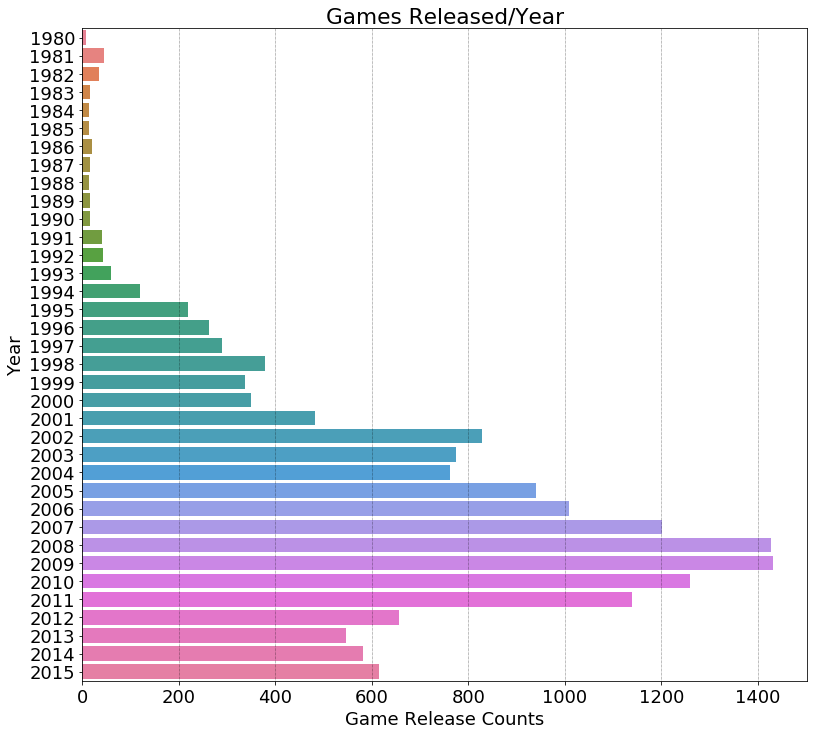

In [112]:
#Games released per year
x = vgsales.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)
plt.figure(figsize = (13, 12))
colors = sns.color_palette('husl', len(y))
ax = sns.barplot(y = y, x = x, orient = 'h', palette = colors)
ax.set_xlabel(xlabel = 'Game Release Counts')
ax.set_ylabel(ylabel = 'Year')
ax.set_title(label = 'Games Released/Year')
plt.show()

In [76]:
#List for counts for above graph by year
x

Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     763
2005     941
2006    1008
2007    1202
2008    1428
2009    1431
2010    1259
2011    1139
2012     657
2013     546
2014     582
2015     614
Name: Global_Sales, dtype: int64

In [82]:
#Create DF (Year, Publisher and Global Sales) 
create_table = vgsales.pivot_table('Global_Sales', index = 'Publisher', columns = 'Year', aggfunc = 'sum')
pubs = create_table.idxmax()
sale = create_table.max()
yrs = create_table.columns.astype(int)
pub_data = pd.concat([pubs, sale], axis = 1)
pub_data.columns = ['Publisher', 'Global Sales']

In [83]:
#Newly created DF for point-plot
pub_data

,Publisher,Global Sales
Year,,
1980,Atari,8.36
1981,Activision,8.50
1982,Atari,19.43
1983,Nintendo,10.96
1984,Nintendo,45.56
1985,Nintendo,49.95
1986,Nintendo,16.18
1987,Nintendo,11.95
1988,Nintendo,36.44


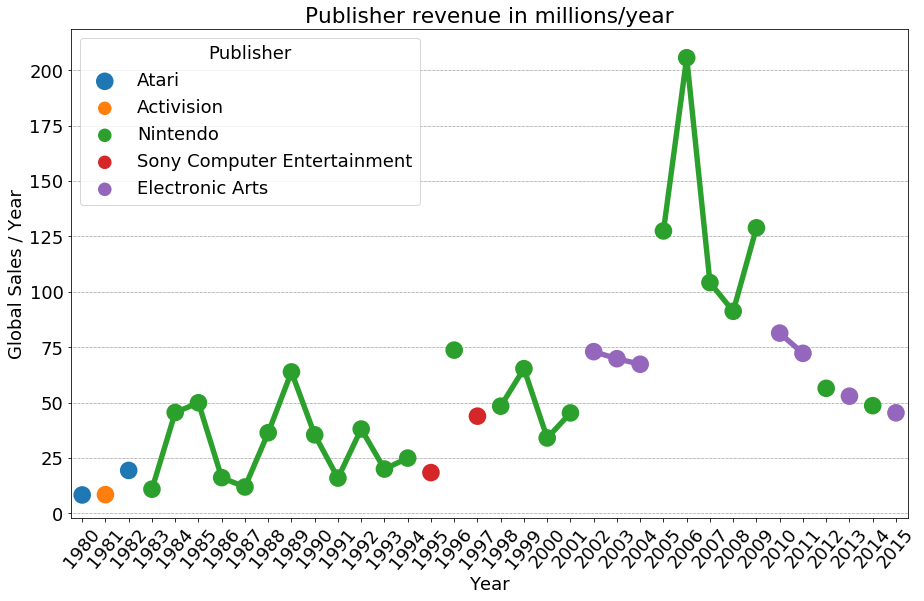

In [110]:
#Point Plot
plt.figure(figsize = (15, 9))
ax = sns.pointplot(y = 'Global Sales', x = yrs, hue = 'Publisher', data = pub_data, size = 15)
ax.set_xlabel(xlabel = 'Year')
ax.set_ylabel(ylabel = 'Global Sales / Year')
ax.set_title(label = 'Publisher revenue in millions/year')
ax.set_xticklabels(labels = yrs, rotation = 50)
plt.show()

In [103]:
#Distribution of Revenue across all regions
#Most revenue contributor
europe = vgsales.pivot_table('EU_Sales', columns = 'Name', index = 'Year', aggfunc = 'sum').sum(axis = 1)
north_america = vgsales.pivot_table('NA_Sales', columns = 'Name', index = 'Year', aggfunc = 'sum').sum(axis = 1)
japan = vgsales.pivot_table('JP_Sales', columns = 'Name', index = 'Year', aggfunc = 'sum').sum(axis = 1)
Other = vgsales.pivot_table('Other_Sales', columns = 'Name', index = 'Year', aggfunc = 'sum').sum(axis = 1)
yRs = Other.index.astype(int)
region = ['Europe', 'North America', 'Japan', 'Other']

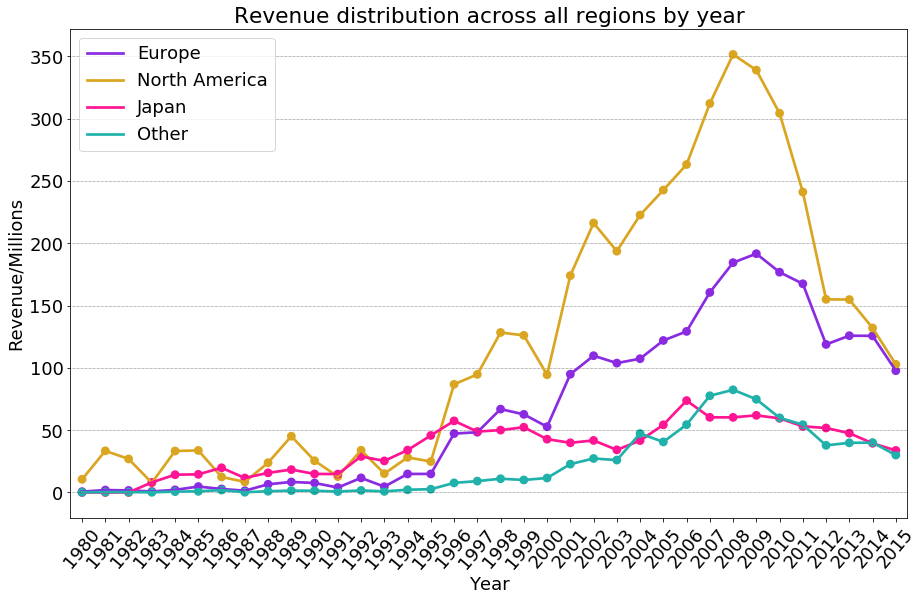

In [116]:
#Plot figure - Distribution of revenue across all regions
plt.figure(figsize = (15, 9))
ax = sns.pointplot(x = yRs, y = europe, color = 'blueviolet', scale = 0.5)
ax = sns.pointplot(x = yRs, y = north_america, color = 'goldenrod', scale = 0.5)
ax = sns.pointplot(x = yRs, y = japan, color = 'deeppink', scale = 0.5)
ax = sns.pointplot(x = yRs, y = Other, color = 'lightseagreen', scale = 0.5)
ax.set_xlabel(xlabel = 'Year')
ax.set_ylabel(ylabel = 'Revenue/Millions')
ax.set_title(label = 'Revenue distribution across all regions by year')
ax.set_xticklabels(labels = yRs, rotation = 50)
ax.legend(handles = ax.lines[::len(yRs)+1], labels = region)
plt.show()

In [ ]:
#Linear Regression Exploration
#If popularity of video game genres over the years have changed, looking at the median
#sales number (increased or decreased overtime)

In [22]:
#make copy of vgsales to avoid overwriting previous exploratory analysis and changes
vgsales_reg = vgsales

In [9]:
vgsales_reg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,8.274000,53.7810,Nintendo,Console
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,31,1.298065,26.1560,Nintendo,Console
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8,4.477500,23.2830,Nintendo,Console
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7,4.714286,21.4500,Nintendo,Console
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20,1.568500,20.3905,Nintendo,HH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,15977,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,14,0.000714,0.0065,Nintendo,HH
15975,15978,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,13,0.000769,0.0065,Nintendo,Console
15976,15979,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,8,0.001250,0.0065,Sony,Console
15977,15980,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,6,0.001667,0.0065,Nintendo,HH


In [10]:
#Removing NAN's from year of release
vgsales_reg = vgsales_reg[vgsales_reg.Year.notnull()]

In [11]:
#Creating a table of total global sales for each genre and year
sales_by_gen_yr = pd.pivot_table(vgsales_reg, index = ['Year'], columns = ['Genre'], values = ['Global_Sales'], aggfunc = np.sum)
sales_by_gen_yr

Global_Sales                                                   \
Genre       Action Adventure Fighting   Misc Platform Puzzle Racing   
Year                                                                  
1980          0.34       NaN     0.77   2.71      NaN    NaN    NaN   
1981         14.84       NaN      NaN    NaN     6.93   2.24   0.48   
1982          6.52       NaN      NaN   0.87     5.03  10.03   1.57   
1983          2.86      0.40      NaN   2.14     6.93   0.78    NaN   
1984          1.85       NaN      NaN   1.45     0.69   3.14   5.95   
1985          3.52       NaN     1.05    NaN    43.17   3.21    NaN   
1986         13.74       NaN      NaN    NaN     9.39    NaN   1.96   
1987          1.12      4.38     5.42    NaN     1.74    NaN    NaN   
1988          1.75       NaN      NaN    NaN    27.73   5.58   2.14   
1989          4.64       NaN      NaN   1.28    20.66  37.75    NaN   
1990          6.39       NaN      NaN    NaN    22.97   6.00   6.26   
1991          6.76      2.24     0.39   0.08     7.64   3.24   1.14   
1992          3.83     12.24    15.25   4.94    13.42   4.84   9.04   
1993          1.81      0.07     8.75   0.30    18.67   3.17   0.36   
1994          1.55      3.74     8.47   2.86    28.74   1.53   2.19   
1995          3.57      0.72    14.85   6.40    16.69   2.71   6.09   
1996         20.58      4.19    18.06  10.68    28.23   3.91  28.24   
1997         27.58      4.96    11.76   5.69    21.85   5.89  31.91   
1998         39.44      9.05    31.66  11.94    29.88   6.34  27.90   
1999         27.78      7.60    14.26  20.65    20.82   1.36  37.27   
2000         34.04      2.98    20.22  15.54    16.06   3.82  19.99   
2001         59.39      9.12    18.12  16.40    39.28   8.00  55.81   
2002         86.77     11.05    25.02  15.67    45.97   5.34  30.20   
2003         67.93      2.14    23.73  23.82    42.89   2.42  52.19   
2004         76.26      8.70    16.78  31.32    47.34   8.43  47.86   
2005         85.69      8.53    19.72  61.24    23.56  20.45  56.42   
2006         66.58     11.47    22.55  67.35    49.80  10.90  34.09   
2007        106.50     24.47    17.61  92.27    35.59  24.00  39.17   
2008        136.39     25.02    35.38  87.03    35.70  15.59  70.66   
2009        139.36     20.68    32.15  76.94    41.09  20.31  34.19   
2010        117.64     16.57    14.89  96.86    31.90  11.18  34.93   
2011        118.96     15.98    22.68  56.08    28.11   5.11  35.01   
2012        122.04      5.99     9.51  22.92    18.55   1.76  14.46   
2013        125.22      6.61     7.21  25.65    25.12   0.99  13.04   
2014         99.02      6.06    16.15  23.68     8.89   1.50  16.69   
2015         70.70      8.03     7.78  11.69     6.05   0.70   7.92   

                                                        
Genre Role-Playing Shooter Simulation  Sports Strategy  
Year                                                    
1980           NaN    7.07        NaN    0.49      NaN  
1981           NaN   10.04       0.45    0.79      NaN  
1982           NaN    3.79        NaN    1.05      NaN  
1983           NaN    0.48        NaN    3.20      NaN  
1984           NaN   31.10        NaN    6.18      NaN  
1985           NaN    1.00       0.03    1.96      NaN  
1986          2.52    3.89        NaN    5.57      NaN  
1987          4.65    0.71        NaN    3.72      NaN  
1988          5.88    0.51       0.03    3.60      NaN  
1989          2.20    1.20        NaN    5.72      NaN  
1990          4.52     NaN       1.14    2.11      NaN  
1991          3.25    2.00       2.14    2.41     0.94  
1992          6.86    0.29       2.14    2.95     0.36  
1993          5.59    3.08       0.19    3.18     0.81  
1994          7.11    8.30       2.73    8.39     3.56  
1995         14.26    4.15       4.18    7.98     6.51  
1996         43.96    6.91      11.33   17.45     5.61  
1997         21.79   22.17       9.65   30.02     7.71  
1998         28.09    9.80       7.11  

In [12]:
sales_by_gen_yr.columns = sales_by_gen_yr.columns.get_level_values(1)
sales_by_gen_yr.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [14]:
#Looking at yearly totals and cumulative proportion of the yearly global sales
year_totals = sales_by_gen_yr.sum(axis = 1)
year_totals = year_totals.sort_index()
Y_cummulative = year_totals.cumsum()/year_totals.sum()

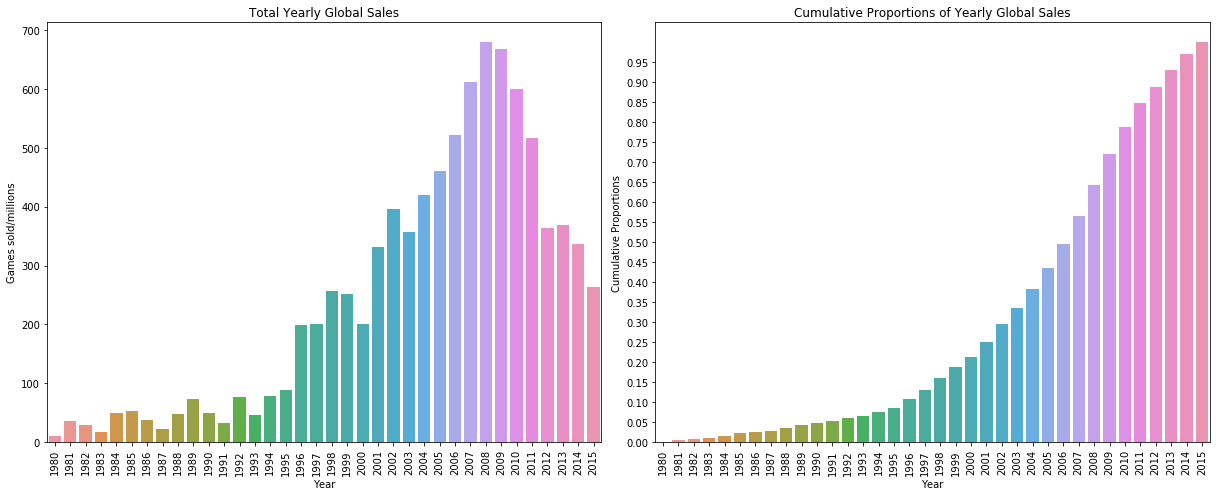

In [25]:
#Plot yearly totals
fig = plt.figure(figsize = (17, 7))
ax1 = fig.add_subplot(121) #location figure #1
ax2 = fig.add_subplot(122) #location figure #2
sns.barplot(y = year_totals.values, x = year_totals.index, ax = ax1)
ax1.set_title('Total Yearly Global Sales')
plt.setp(ax1.get_xticklabels(), rotation = 90)
ax1.set_xlabel('Year')
ax1.set_ylabel('Games sold/millions')

#Plot cumulative proportions
sns.barplot(y = Y_cummulative.values, x = Y_cummulative.index, ax = ax2)
ax2.set_title('Cumulative Proportions of Yearly Global Sales')
plt.setp(ax2.get_xticklabels(), rotation = 90)
ax2.set_xlabel('Year')
ax2.set_ylabel('Cumulative Proportions')
ax2.yaxis.set_ticks(np.arange(0, 1, 0.05)) #start 0, stop 1, steps by 0.05
fig.tight_layout()

In [ ]:
#Genres are fully represented after 1991
#More than 95% of the sales are generated after 1991 (1 - 0.05 = 0.95)

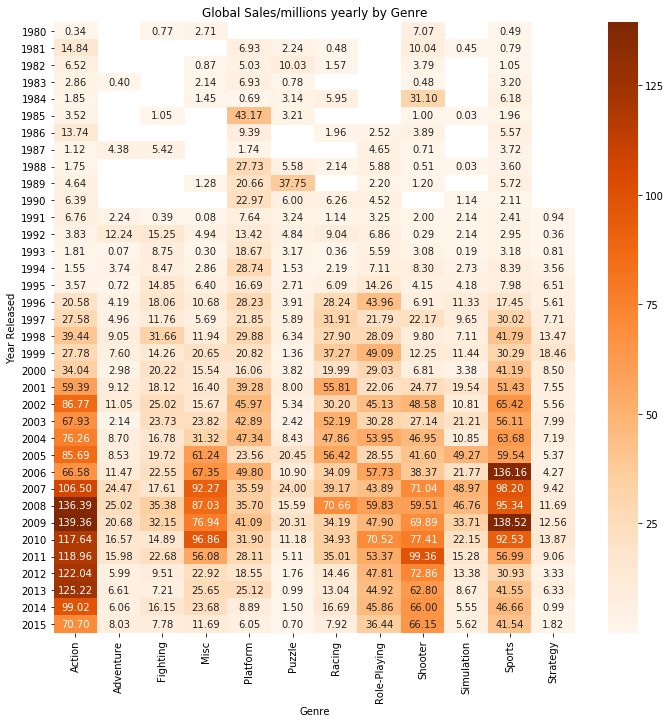

In [28]:
#Heatmap plot for global sales and games released yearly by genre
plt.figure(figsize = (10, 10))
ax = sns.heatmap(sales_by_gen_yr, annot = True, fmt = '.2f', cmap = 'Oranges')
plt.tight_layout()
plt.ylabel('Year Released')
plt.xlabel('Genre')
plt.title('Global Sales/millions yearly by Genre')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

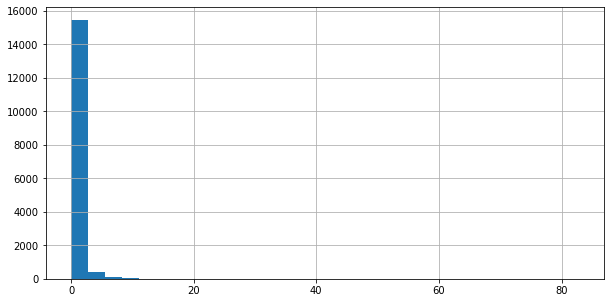

In [35]:
#Plotting histogram of global sales
plt.figure(figsize = (10, 5))
vgsales_reg.Global_Sales.hist(bins = 30)
plt.show()
#highly skewed to the right therefore looking at yearly average of global sales
#will not be an acceptable measure, as such we will use the median number of games
#sold per genre for each year since the median will be an acceptable measure in our case.

In [23]:
                ########## Extracting data from 1991 - 2015 ##########
vgsales_reg = vgsales_reg.loc[vgsales_reg.Year >= 1991]
vgsales_reg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,8.274000,53.7810,Nintendo,Console
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8,4.477500,23.2830,Nintendo,Console
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7,4.714286,21.4500,Nintendo,Console
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20,1.568500,20.3905,Nintendo,HH
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,10,3.001000,19.5065,Nintendo,HH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,15977,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,14,0.000714,0.0065,Nintendo,HH
15975,15978,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,13,0.000769,0.0065,Nintendo,Console
15976,15979,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,8,0.001250,0.0065,Sony,Console
15977,15980,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,6,0.001667,0.0065,Nintendo,HH


In [24]:
#median global sales value by genre and year
med_sales_gen_yr = pd.pivot_table(vgsales_reg, index = ['Year'],
                                 columns = ['Genre'], values = ['Global_Sales'], aggfunc = np.median)
med_sales_gen_yr.columns = med_sales_gen_yr.columns.get_level_values(1)
med_sales_gen_yr.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1991,0.420,1.120,0.39,0.080,0.78,0.585,1.140,0.38,0.23,1.070,0.280,0.215
1992,3.830,0.470,1.66,2.470,1.00,1.120,4.520,0.97,0.13,2.140,0.370,0.060
1993,0.145,0.070,0.45,0.060,0.56,0.980,0.180,0.32,1.54,0.190,0.180,0.405
1994,0.050,0.435,0.18,0.050,1.79,0.700,0.190,0.12,0.33,0.280,0.345,0.310
1995,0.380,0.050,0.23,0.085,0.30,0.175,0.155,0.34,0.10,0.085,0.190,0.125


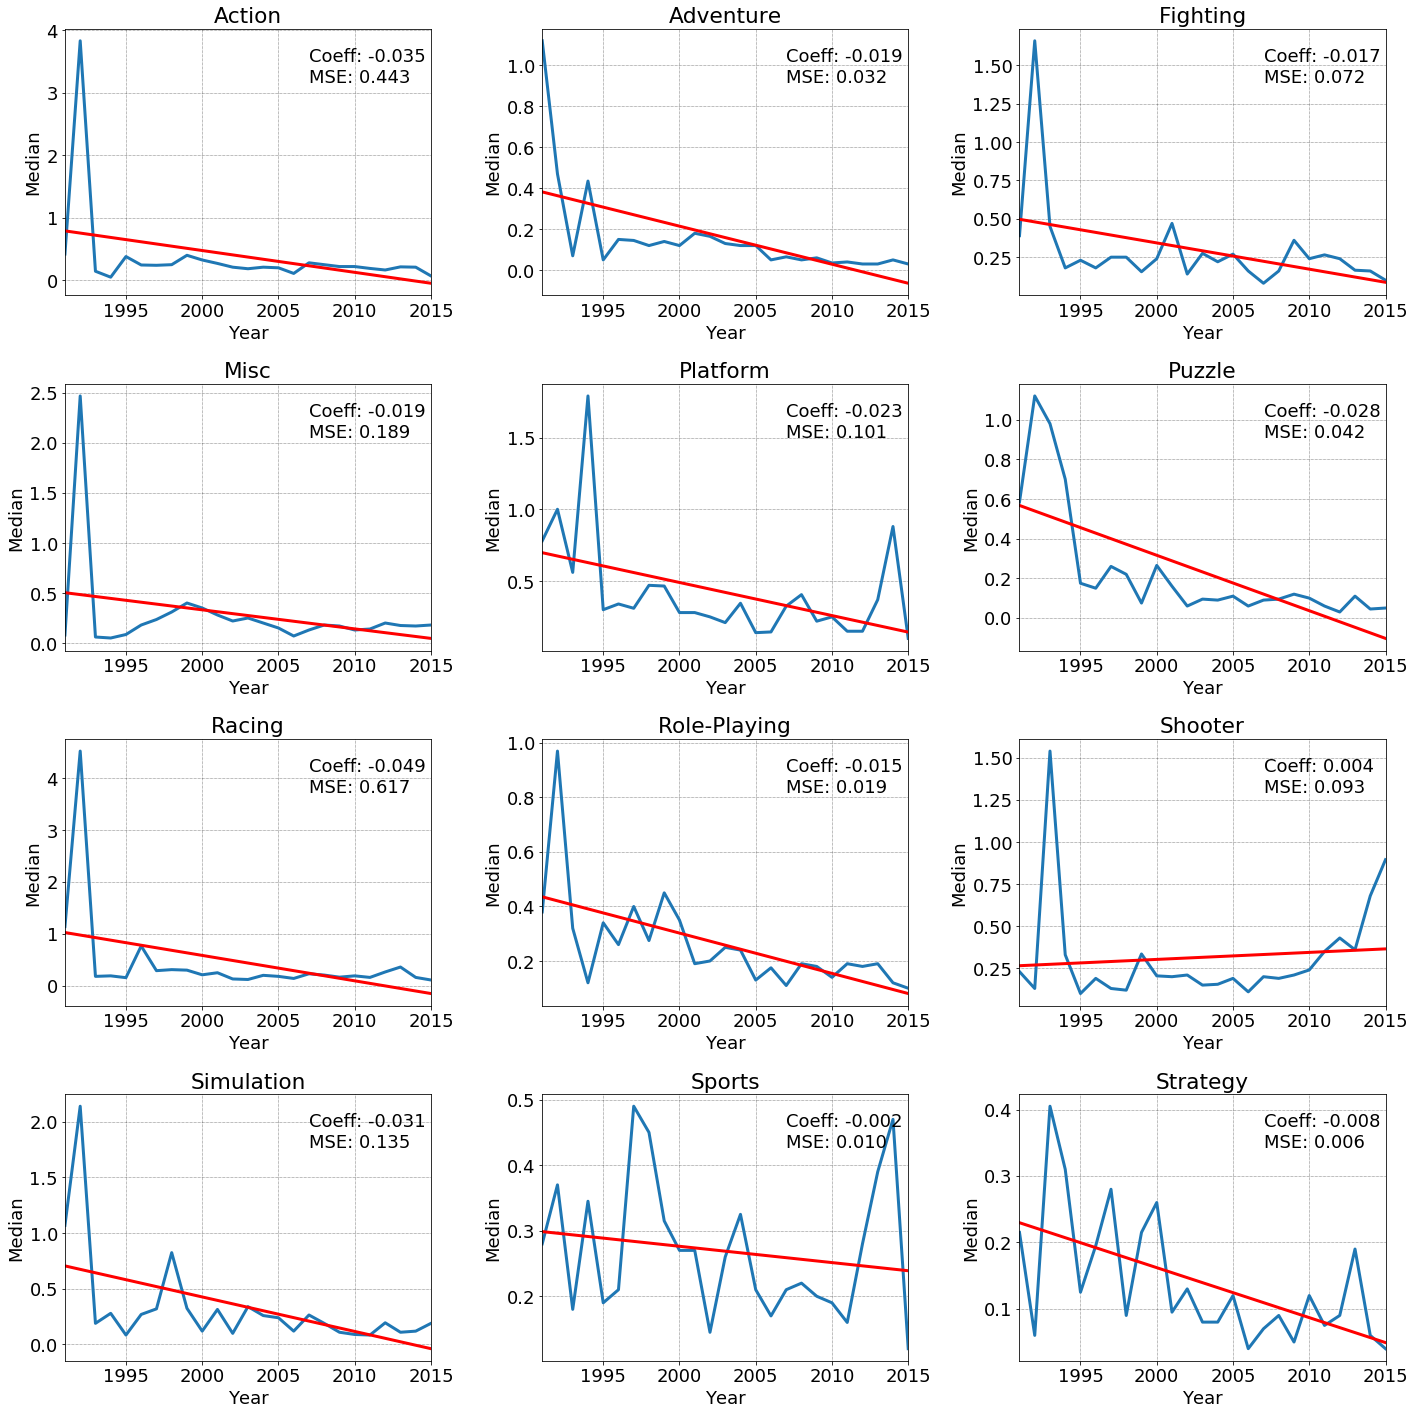

In [29]:
#Linear regression plots for all genres
def lin_regression_plot(vgsales_reg):
    regr_coeff = []
    regr_mse = []
    fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))
    
    x_data = np.transpose(np.matrix(vgsales_reg.index))
    
    count = 0
    
    for genre in vgsales_reg.columns:
        axs = axes[count//3, count%3]
        y_data = vgsales_reg[genre].to_frame()
        
        #Linear Regression
        regressor = linear_model.LinearRegression()
        regressor.fit(x_data, y_data)
        
        #Mean Squared Error
        MSE = np.mean((regressor.predict(x_data) - y_data)**2)
        
        regr_coeff.append(regressor.coef_[0][0])
        regr_mse.append(MSE[0])
        
        vgsales_reg[genre].plot(ax = axs)
        axs.plot(x_data, regressor.predict(x_data), color = 'red')
        
        y_lims = axs.get_ylim()
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regressor.coef_,MSE)
        y_loc = 0.80*(y_lims[1] - y_lims[0]) + y_lims[0]
        axs.text(2007, y_loc, txt)
                      
        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count +=1
    fig.tight_layout()
                      
    return [regr_coeff, regr_mse]
                      
[regr_coeff, regr_mse] = lin_regression_plot(med_sales_gen_yr)
        

In [ ]:
#All genre games excluding shooter games have a negative trend. Large spike in sales 
#is seen before 1995 for most genre sales.

In [10]:
            ########## Extracting data from 1995 - 2015 ##########
vgsales_reg_after = vgsales

In [18]:
vgsales_reg_after = vgsales_reg_after.loc[vgsales_reg_after.Year >= 1995]
vgsales_reg_after

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_In_Market,Avg_Annual_Sales,Year_1_Sales,First_Party,Platform_Type
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,8.274000,53.7810,Nintendo,Console
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8,4.477500,23.2830,Nintendo,Console
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7,4.714286,21.4500,Nintendo,Console
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20,1.568500,20.3905,Nintendo,HH
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,10,3.001000,19.5065,Nintendo,HH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,15977,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,14,0.000714,0.0065,Nintendo,HH
15975,15978,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,13,0.000769,0.0065,Nintendo,Console
15976,15979,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,8,0.001250,0.0065,Sony,Console
15977,15980,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,6,0.001667,0.0065,Nintendo,HH


In [19]:
#median global sales value by genre and year
med_sales_gen_yr_after = pd.pivot_table(vgsales_reg_after, index = ['Year'],
                                 columns = ['Genre'], values = ['Global_Sales'], aggfunc = np.median)
med_sales_gen_yr_after.columns = med_sales_gen_yr_after.columns.get_level_values(1)
med_sales_gen_yr_after.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1995,0.380,0.050,0.230,0.085,0.300,0.175,0.155,0.340,0.100,0.085,0.190,0.125
1996,0.245,0.150,0.180,0.180,0.340,0.150,0.765,0.260,0.190,0.270,0.210,0.195
1997,0.240,0.145,0.250,0.235,0.310,0.260,0.290,0.400,0.130,0.320,0.490,0.280
1998,0.250,0.120,0.250,0.310,0.470,0.220,0.310,0.275,0.120,0.825,0.450,0.090
1999,0.400,0.140,0.155,0.400,0.465,0.075,0.300,0.450,0.335,0.325,0.315,0.215


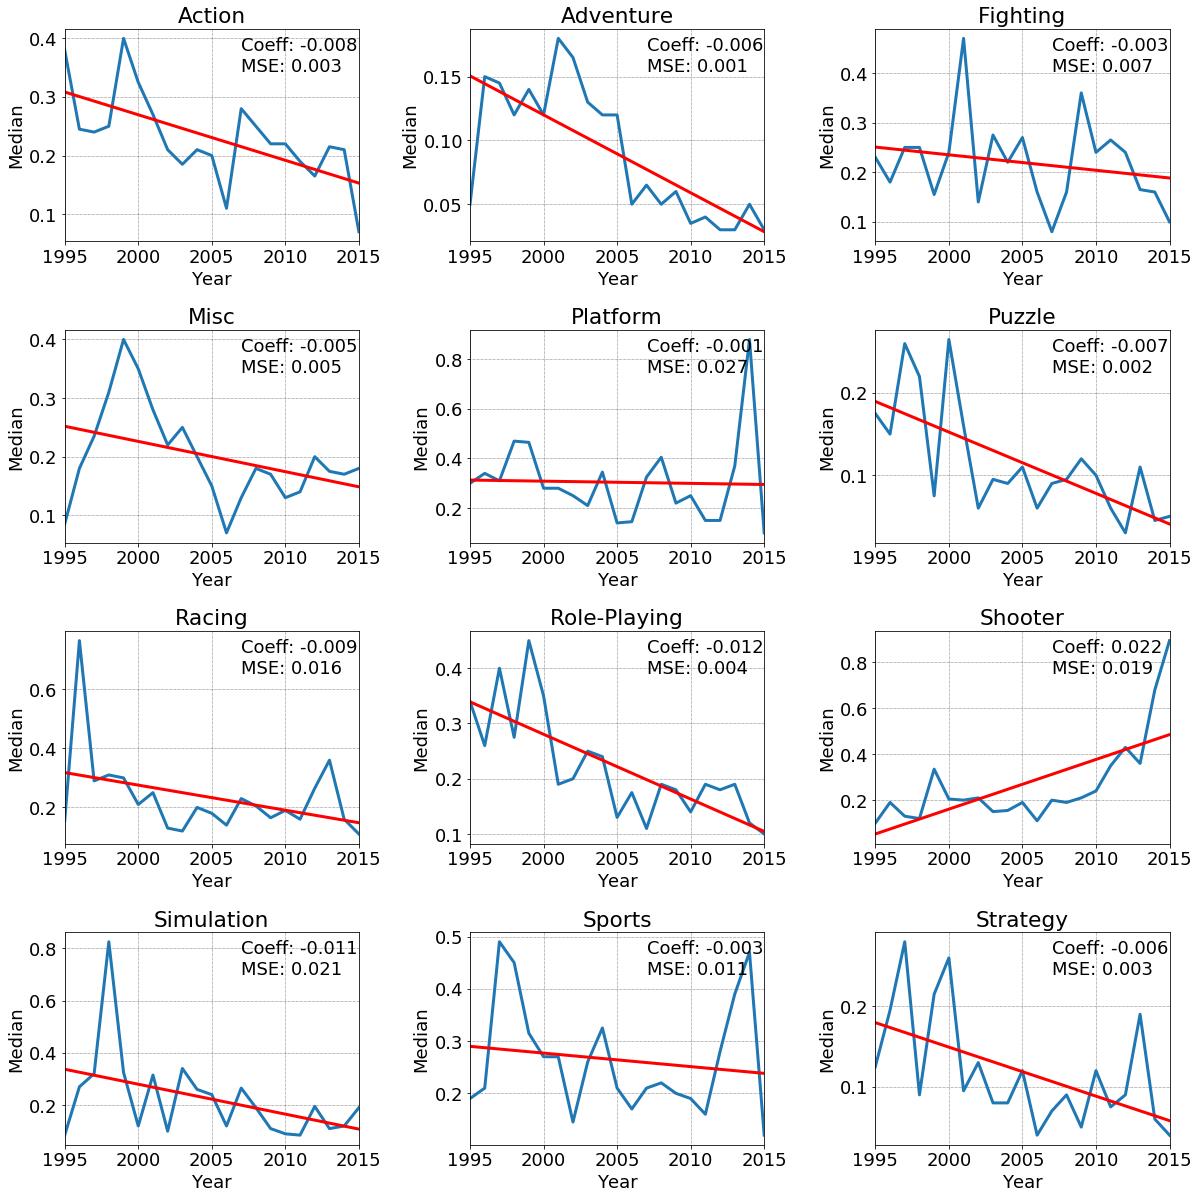

In [20]:
#Linear regression plots for all genres
def lin_regression_plot_after(vgsales_reg_after):
    regr_coeff_after = []
    regr_mse_after = []
    fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (17, 17))
    
    x_data = np.transpose(np.matrix(vgsales_reg_after.index))
    
    count = 0
    
    for genre in vgsales_reg_after.columns:
        axs = axes[count//3, count%3]
        y_data = vgsales_reg_after[genre].to_frame()
        
        #Linear Regression
        regressor = linear_model.LinearRegression()
        regressor.fit(x_data, y_data)
        
        #Mean Squared Error
        MSE = np.mean((regressor.predict(x_data) - y_data)**2)
        
        regr_coeff_after.append(regressor.coef_[0][0])
        regr_mse_after.append(MSE[0])
        
        vgsales_reg_after[genre].plot(ax = axs)
        axs.plot(x_data, regressor.predict(x_data), color = 'red')
        
        y_lims = axs.get_ylim()
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regressor.coef_,MSE)
        y_loc = 0.80*(y_lims[1] - y_lims[0]) + y_lims[0]
        axs.text(2007, y_loc, txt)
                      
        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count +=1
    fig.tight_layout()
                      
    return [regr_coeff_after, regr_mse_after]
                      
[regr_coeff_after, regr_mse_after] = lin_regression_plot_after(med_sales_gen_yr_after)

In [ ]:
#Excluding years before 1995, every genre shows a decline in sales except for shooter games. 
#Excluding the years prior to 1995 shows a very high decline in all genres except sports and platform
#showing a stability in declining sales. 
#From the declining genres, simulation, role playing, racing and action games incurred the 
#most loss in sales.